In [2]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('sales_data.xlsx')
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [4]:
# Shape of Dataframe
df.shape

(5000, 40)

In [5]:
# Validate if there are any negative values
df.REVENUE.min()

38.5

In [6]:
# Validate if there are any negative values
df.TOTAL_ORDERS.min()

1

In [7]:
df['LATEST_ORDER_DATE'] = pd.to_datetime(df['LATEST_ORDER_DATE'])

In [8]:
# Recency = latest Date - Last Invoice Date, Frequency = count of invoice no. of transection(s), Monetary = Sum of total 
# Amount for each customers
import datetime as dt

# set letest date 2021-10-24 as last invoice date was 2016-12-30. this is to calculate the number of days from recent purches
Letest_date = dt.datetime(2021,10,24)

# create RFM Modelling scores for each customers
RFMScores = df.groupby('CustomerID').agg({'LATEST_ORDER_DATE': lambda x : (Letest_date - x.max()).days,'TOTAL_ORDERS': lambda x: len(x),'REVENUE':lambda x : x.sum()})

# Convert Invoice date into type int
RFMScores['LATEST_ORDER_DATE'] = RFMScores['LATEST_ORDER_DATE'].astype(int)



In [9]:
# Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns = {'LATEST_ORDER_DATE':'Recency',
                           'TOTAL_ORDERS':'Frequency',
                           'REVENUE':'Monetary'},inplace = True)
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,1,52,1,34847.40
1,2,93,1,32486.98
2,3,52,1,24178.97
3,4,4,1,18554.49
4,5,129,1,16884.99


In [10]:
# Discreptive Statistics (Recency)
RFMScores.Recency.describe()

count    5000.000000
mean       86.420000
std        80.156513
min         0.000000
25%         6.000000
50%        67.000000
75%       170.250000
max       206.000000
Name: Recency, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


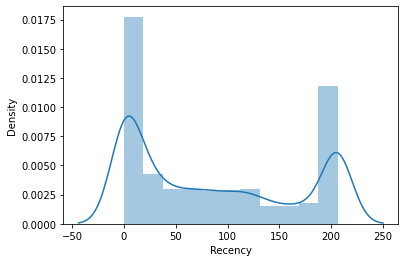

In [11]:
# Recency Distribution plot
x= RFMScores['Recency']
ax = sns.distplot(x)

In [12]:
# Discreptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    5000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Frequency, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


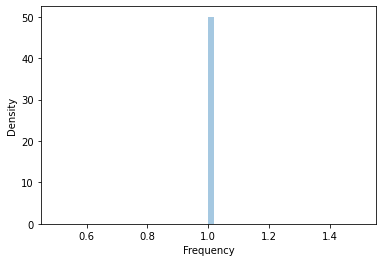

In [13]:
# Frequency Distribution plot
x= RFMScores.query('Frequency< 1000')['Frequency']
ax = sns.distplot(x)

In [14]:
# Discreptive Statistics (Monetary)
RFMScores.Monetary.describe()

count     5000.000000
mean      1681.523840
std       1998.618678
min         38.500000
25%        315.097500
50%        966.725000
75%       2493.072500
max      34847.400000
Name: Monetary, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


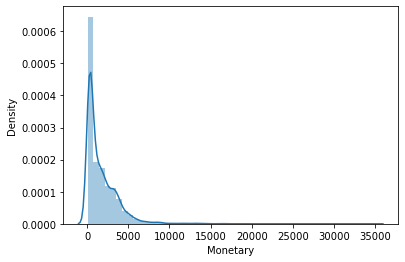

In [15]:
# Monetary Distribution plot
x= RFMScores['Monetary']
ax = sns.distplot(x)

In [16]:
# Split into four segment using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quanitles = quantiles.to_dict()

In [17]:
quantiles

,Recency,Frequency,Monetary
0.25,6.00,1.0,315.0975
0.50,67.00,1.0,966.7250
0.75,170.25,1.0,2493.0725


In [18]:
# Functions to create R,F and M segment
def Rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMscoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [19]:
# Calculate Add R,F and M segment value columns in the existing dataet to show R,F and M segment Values
RFMScores['R'] = RFMScores['Recency'].apply(Rscoring,args = ('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMscoring,args = ('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMscoring,args = ('Monetary',quantiles,))
RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,1,52,1,34847.40,2,4,1
1,2,93,1,32486.98,3,4,1
2,3,52,1,24178.97,2,4,1
3,4,4,1,18554.49,1,4,1
4,5,129,1,16884.99,3,4,1
5,6,31,1,16693.78,2,4,1
6,7,115,1,15999.94,3,4,1
7,8,61,1,15840.36,2,4,1
8,9,111,1,14526.72,3,4,1
9,10,12,1,14309.92,2,4,1


In [20]:
# Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

# Calculate and add RFMScores value column showing total sum of RFMGroup Values
RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis = 1)
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,1,52,1,34847.40,2,4,1,241,7
1,2,93,1,32486.98,3,4,1,341,8
2,3,52,1,24178.97,2,4,1,241,7
3,4,4,1,18554.49,1,4,1,141,6
4,5,129,1,16884.99,3,4,1,341,8


In [21]:
# Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum','Gold','Silver','Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore,q=4,labels=Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,1,52,1,34847.40,2,4,1,241,7,Platinum
1,2,93,1,32486.98,3,4,1,341,8,Platinum
2,3,52,1,24178.97,2,4,1,241,7,Platinum
3,4,4,1,18554.49,1,4,1,141,6,Platinum
4,5,129,1,16884.99,3,4,1,341,8,Platinum
5,6,31,1,16693.78,2,4,1,241,7,Platinum
6,7,115,1,15999.94,3,4,1,341,8,Platinum
7,8,61,1,15840.36,2,4,1,241,7,Platinum
8,9,111,1,14526.72,3,4,1,341,8,Platinum
9,10,12,1,14309.92,2,4,1,241,7,Platinum


In [22]:
! pip install chart_studio

In [23]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

In [26]:
#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Monetary"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

# Recency vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Recency"},
        xaxis= {'title': "Monetary"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


# K-means Clusters

In [24]:
# HAndle Negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
# apply handle_neg_n_zero function to Recency and monetary column
RFMScores['Recency']= [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary']= [handle_neg_n_zero(x) for x in RFMScores.Monetary]

# Perform log transformation to bring data into near normal distribution
Log_Tfd_Data = RFMScores[['Recency','Frequency','Monetary']].apply(np.log, axis = 1).round(3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



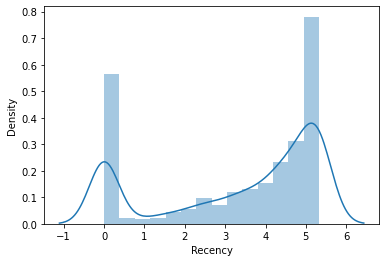

In [25]:
# Data Distribution after data normalizaton for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



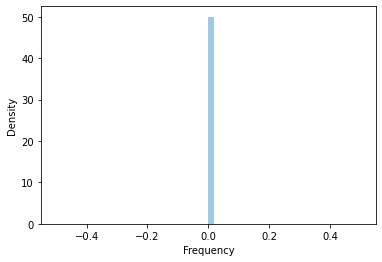

In [26]:
# Data Distribution after data normalization for frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency <10000')['Frequency']
ax = sns.distplot(Frequency_Plot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



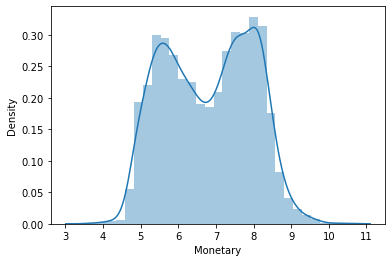

In [27]:
# Data Distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Frequency <10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [28]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data,index= RFMScores.index,columns = Log_Tfd_Data.columns)

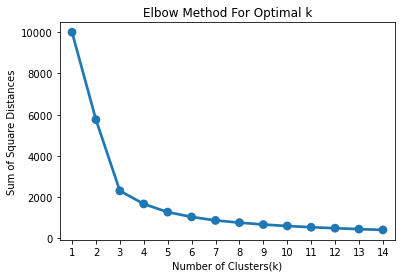

In [30]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,1,52,1,34847.40,2,4,1,241,7,Platinum,1
1,2,93,1,32486.98,3,4,1,341,8,Platinum,1
2,3,52,1,24178.97,2,4,1,241,7,Platinum,1
3,4,4,1,18554.49,1,4,1,141,6,Platinum,1
4,5,129,1,16884.99,3,4,1,341,8,Platinum,1


<Figure size 504x504 with 0 Axes>

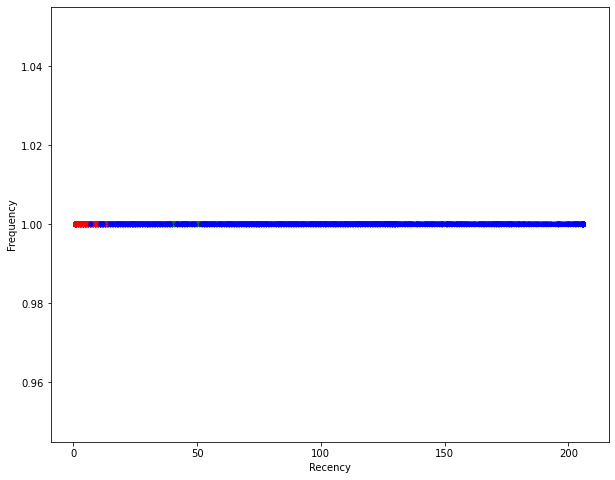

In [35]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color'])

In [42]:
RFMScores.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
0,1,52,1,34847.40,2,4,1,241,7,Platinum,1,green
1,2,93,1,32486.98,3,4,1,341,8,Platinum,1,green
2,3,52,1,24178.97,2,4,1,241,7,Platinum,1,green
3,4,4,1,18554.49,1,4,1,141,6,Platinum,1,green
4,5,129,1,16884.99,3,4,1,341,8,Platinum,1,green
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,248709,53,1,59.95,2,4,4,244,10,Silver,2,blue
4996,248710,118,1,59.94,3,4,4,344,11,Bronze,2,blue
4997,259042,127,1,51.94,3,4,4,344,11,Bronze,2,blue
4998,266024,131,1,45.94,3,4,4,344,11,Bronze,2,blue


In [45]:
RFMScores.reset_index().to_excel('RFM_Sales_segment_1.xlsx', sheet_name='RFM_segment')